## Análise Exploratória de Dados 

Este projeto tem como objetivo compreender como é feita uma análise exploratória de dados. Este estudo apresenta um levamento de preços de aluguel de apartamentos e casas na cidade de Munique (Alemanha). 

Utilizou-se o material do Professor Fernando de Pol Mayer da UFPR como referência. O estudo do Professor Fernando foi realizado utilizando a linguagem R e para este projeto transcrevi a análise para linguagem Python e complementei com análises adicionais.

- Aluguel: valor do aluguel em euros
- Metragem: tamanho em metros quadrados
- Ano: ano de construção do local
- Aquecimento: indicação se existe ou não aquecimento no local (true or false)
- Loc: classificação do imóvel quanto à faixa de renda do bairro

In [58]:
import pandas as pd
import numpy as nd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('dados_aluguel.csv', sep=',')

In [11]:
# Visualizando as cinco primeiras linhas
df.head()

,aluguel,metragem,ano,aquecimento,loc
0,693.3,50,1972,0,Média
1,422.0,54,1972,0,Média
2,736.6,70,1972,0,Média
3,732.2,50,1972,0,Média
4,1295.1,55,1893,0,Média


In [12]:
# Visualizando o dataset completo
df

,aluguel,metragem,ano,aquecimento,loc
0,693.3,50,1972,0,Média
1,422.0,54,1972,0,Média
2,736.6,70,1972,0,Média
3,732.2,50,1972,0,Média
4,1295.1,55,1893,0,Média
...,...,...,...,...,...
1964,1281.4,60,1973,0,Alta
1965,644.9,52,1974,0,Alta
1966,662.8,30,1964,0,Alta
1967,710.0,50,1969,0,Alta


In [13]:
# Tamanho do dataset 
df.shape

(1969, 5)

### Classificando as variáveis:

- Aluguel: quantitativa contínua
- Metragem: quantitativa discreta
- Ano: quantitativa discreta
- Aquecimento: quantitativa discreta
- Loc: qualitativa ordinal

In [14]:
# Obtendo informações sobre o tipo das variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluguel      1969 non-null   float64
 1   metragem     1969 non-null   int64  
 2   ano          1969 non-null   int64  
 3   aquecimento  1969 non-null   int64  
 4   loc          1969 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 77.0+ KB


In [16]:
# Obtendo algumas medidas estatísticas das variáveis

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aluguel,1969.0,811.880498,379.002520,102.0,544.2,737.8,1022.0,3000.0
metragem,1969.0,67.732351,20.855557,30.0,52.0,67.0,82.0,120.0
ano,1969.0,1948.475876,29.017298,1890.0,1934.0,1957.0,1972.0,1988.0
aquecimento,1969.0,0.197562,0.398261,0.0,0.0,0.0,0.0,1.0


Pela tabela pode-se observar que a média do valor do aluguel é de 811 euros, a média da metragem das construções é de 67 m² e a média do ano de construção das residências é de 1948. A construção mais antiga do conjunto de dados é de 1890 e a construção mais nova é de 1988.

In [17]:
# Verificando valores nulos no dataset

df.isnull().sum()

aluguel        0
metragem       0
ano            0
aquecimento    0
loc            0
dtype: int64

## Análise das Variáveis 

### Variável: Ano

* Ano de construção do local

In [51]:
# Mostrando os valores distintos da variável ano

df['ano'].unique().size

73

In [94]:
# Frequência absoluta

ano_ab = df.groupby('ano')['ano'].count()
ano_ab

ano
1890      1
1893    305
1894      2
1895      2
1896      3
       ... 
1984      7
1985     43
1986      1
1987      3
1988     24
Name: ano, Length: 73, dtype: int64

In [91]:
# Frequência relativa

ano_rel = ((df.groupby('ano')['ano'].count())/df.shape[0]).sort_values()
ano_rel

ano
1890    0.000508
1911    0.000508
1920    0.000508
1924    0.000508
1908    0.000508
          ...   
1981    0.060945
1934    0.114779
1893    0.154901
1972    0.184865
1957    0.279837
Name: ano, Length: 73, dtype: float64

<AxesSubplot:title={'center':'Ano das construções'}, xlabel='ano'>

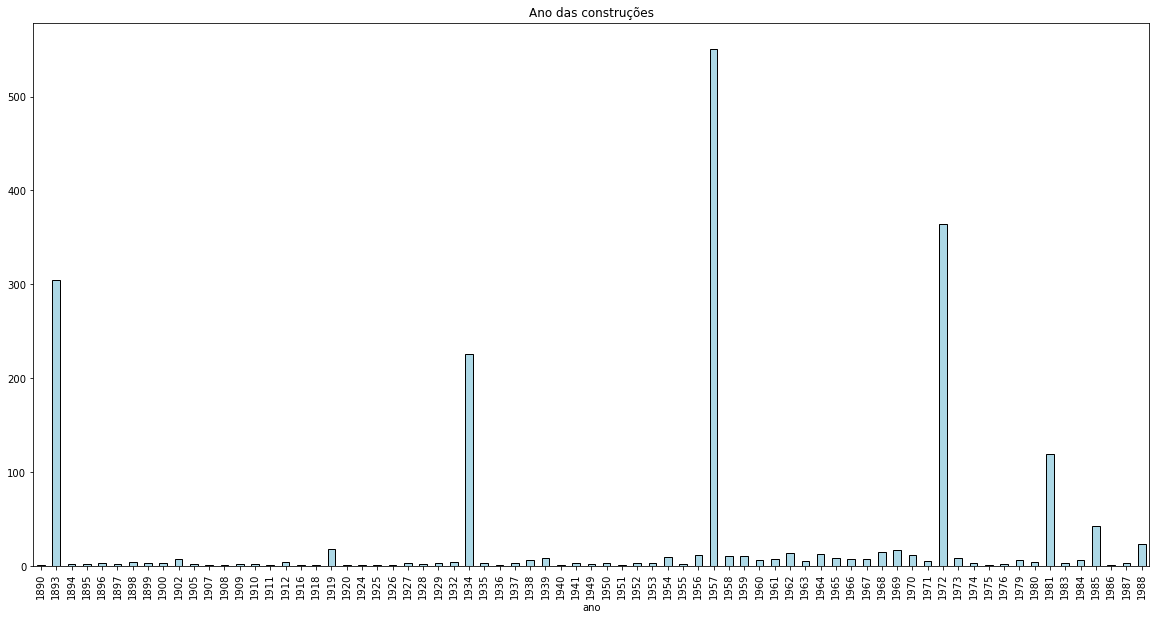

In [108]:
# Plotando o gráfico de barras 

plt.figure(figsize=(20, 10))
(ano_ab).plot(kind='bar', color='lightblue', edgecolor='black', title='Ano das construções')

In [90]:
#Contabilizando o nº de observações na amostra do ano 1957

(df.ano == 1957).sum()

551

As construções de 1957 foram as que tiveram maior ocorrência com 551 observações.

### Variável: Aquecimento

* Indica se a residência possui aquecimento ou não

     0 - Sim
     1 - Não

In [97]:
# Frequência absoluta

aq_ab = df.groupby('aquecimento')['aquecimento'].count()
aq_ab

aquecimento
0    1580
1     389
Name: aquecimento, dtype: int64

In [100]:
# Frequência relativa

aq_rel = ((df.groupby('aquecimento')['aquecimento'].count())/df.shape[0])
round((aq_rel*100),2)

aquecimento
0    80.24
1    19.76
Name: aquecimento, dtype: float64

<AxesSubplot:title={'center':'Aquecimento nas construções'}, xlabel='aquecimento'>

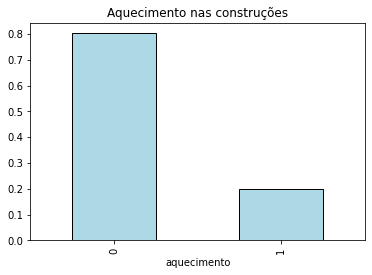

In [102]:
# Plotando o gráfico de barras 

(aq_rel).plot(kind='bar', color='lightblue', edgecolor='black', title='Aquecimento nas construções')

O gráfico indica que 80% das construções possuem aquecimento no local.

### Variável: Loc

* Classificação do imóvel quanto à faixa de renda do bairro

In [112]:
# Frequência absoluta

loc_ab = df.groupby('loc')['loc'].count()
loc_ab

loc
Alta      550
Baixa     172
Média    1247
Name: loc, dtype: int64

In [185]:
# Frequência relativa

loc_rel = ((df.groupby('loc')['loc'].count())/df.shape[0])
round((loc_rel*100),2)

loc
Alta     27.93
Baixa     8.74
Média    63.33
Name: loc, dtype: float64

<AxesSubplot:title={'center':'Classificação do imóvel quanto à faixa de renda do local'}, xlabel='loc'>

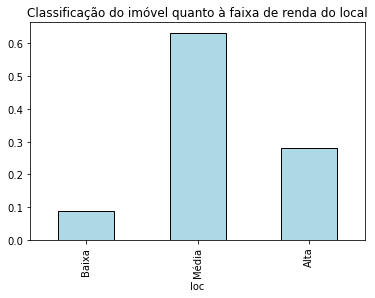

In [139]:
# Plotando o gráfico de barras 

(loc_rel).loc[['Baixa','Média','Alta']].plot(kind='bar', color='lightblue', edgecolor='black', title='Classificação do imóvel quanto à faixa de renda do local')

Observa-se que 63% das residências estão localizadas em bairros classificados com renda média, seguido de 28% em bairros classificados com renda alta e 9% em locais de renda baixa.

### Cruzamento das variáveis Loc x Aquecimento

In [237]:
# Agrupando a variável loc em relação a variável aquecimento
#Frequência absoluta

loc_aq_ab=df.groupby(['loc','aquecimento'])['aquecimento'].count().unstack()
loc_aq_ab

aquecimento,0,1
loc,,
Alta,483,67
Baixa,122,50
Média,975,272


In [250]:
# Frequência relativa

loc_aq_rel = ((df.groupby(['loc','aquecimento'])['aquecimento'].count().unstack())/df.shape[0])
round((loc_aq_rel*100),2)

aquecimento,0,1
loc,,
Alta,24.53,3.40
Baixa,6.20,2.54
Média,49.52,13.81


<AxesSubplot:title={'center':'Classificação do imóvel quanto à renda x Aquecimento'}, xlabel='loc'>

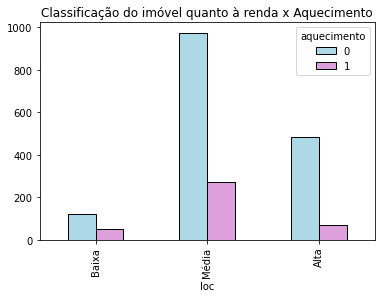

In [242]:
# Plotando o gráfico de barras 

colors=['lightblue','plum']
(loc_aq_ab).loc[['Baixa','Média','Alta']].plot(kind='bar', color=colors, edgecolor='black', title='Classificação do imóvel quanto à renda x Aquecimento')

Observa-se que 975 residências (49.5%) estão localizadas na região de renda média e possuem aquecimento nas casas. Além disso, 50 residências (2.5%) estão localizadas em bairros de renda baixa e não possuem aquecimento nas casas.

### Variável: Aluguel 

* Valor do aluguel das residências

In [121]:
# Algumas medidas descritivas da variável Aluguel 
df['aluguel'].describe()

count    1969.000000
mean      811.880498
std       379.002520
min       102.000000
25%       544.200000
50%       737.800000
75%      1022.000000
max      3000.000000
Name: aluguel, dtype: float64

In [122]:
#Variância
df['aluguel'].var()

143642.91051377673

In [123]:
# Coeficiente de variação
round((df['aluguel'].std())/(df['aluguel'].mean()),3)

0.467

A média dos aluguéis é de 811.8 euros. A mediana é de 737.8. O maior aluguel é de 3000 euros e o menor é de 102 euros.  

In [179]:
#Gerando um intervalo de classes da variável aluguel com 12 divisões

df['aluguel_grupo'] = pd.cut(df['aluguel'], bins=12)
df['aluguel_grupo']

0         (585.0, 826.5]
1         (343.5, 585.0]
2         (585.0, 826.5]
3         (585.0, 826.5]
4       (1068.0, 1309.5]
              ...       
1964    (1068.0, 1309.5]
1965      (585.0, 826.5]
1966      (585.0, 826.5]
1967      (585.0, 826.5]
1968      (343.5, 585.0]
Name: aluguel_grupo, Length: 1969, dtype: category
Categories (12, interval[float64]): [(99.102, 343.5] < (343.5, 585.0] < (585.0, 826.5] < (826.5, 1068.0] ... (2034.0, 2275.5] < (2275.5, 2517.0] < (2517.0, 2758.5] < (2758.5, 3000.0]]

In [182]:
#Ordenando a coluna aluguel_grupo em ordem crescente

df.sort_values( by='aluguel_grupo', ascending=True)

,aluguel,metragem,ano,aquecimento,loc,aluguel_grupo
1072,295.5,70,1957,0,Alta,"(99.102, 343.5]"
1561,202.7,65,1957,0,Baixa,"(99.102, 343.5]"
1562,240.0,68,1957,0,Baixa,"(99.102, 343.5]"
1563,240.0,65,1957,0,Baixa,"(99.102, 343.5]"
1564,265.0,65,1957,0,Baixa,"(99.102, 343.5]"
...,...,...,...,...,...,...
1136,2299.0,110,1959,0,Média,"(2275.5, 2517.0]"
795,2537.9,95,1957,0,Média,"(2517.0, 2758.5]"
1283,3000.0,120,1893,0,Média,"(2758.5, 3000.0]"
1465,2764.5,120,1934,0,Alta,"(2758.5, 3000.0]"


In [178]:
#Frequência absoluta por classe

al_ab=df.groupby(['aluguel_grupo'])['aluguel_grupo'].count()
al_ab

aluguel_grupo
(99.102, 343.5]     119
(343.5, 585.0]      485
(585.0, 826.5]      590
(826.5, 1068.0]     330
(1068.0, 1309.5]    245
(1309.5, 1551.0]    110
(1551.0, 1792.5]     60
(1792.5, 2034.0]     18
(2034.0, 2275.5]      5
(2275.5, 2517.0]      3
(2517.0, 2758.5]      1
(2758.5, 3000.0]      3
Name: aluguel_grupo, dtype: int64

In [187]:
# Frequência relativa por classe

al_rel = ((df.groupby(['aluguel_grupo'])['aluguel_grupo'].count())/df.shape[0])
round((al_rel*100),2)

aluguel_grupo
(99.102, 343.5]      6.04
(343.5, 585.0]      24.63
(585.0, 826.5]      29.96
(826.5, 1068.0]     16.76
(1068.0, 1309.5]    12.44
(1309.5, 1551.0]     5.59
(1551.0, 1792.5]     3.05
(1792.5, 2034.0]     0.91
(2034.0, 2275.5]     0.25
(2275.5, 2517.0]     0.15
(2517.0, 2758.5]     0.05
(2758.5, 3000.0]     0.15
Name: aluguel_grupo, dtype: float64

<AxesSubplot:title={'center':'Histograma do Valor do Aluguel das Residências'}, ylabel='Frequency'>

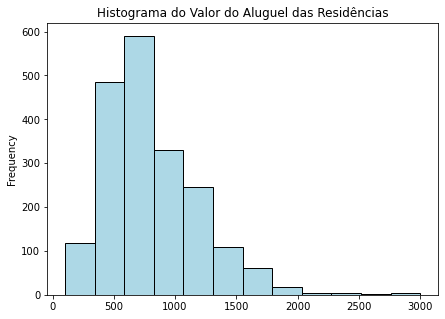

In [198]:
#Plotando um Histograma com a frequência absoluta

plt.figure(figsize=(7, 5))
df['aluguel'].plot(kind='hist', color='lightblue', edgecolor='black', bins=12, title='Histograma do Valor do Aluguel das Residências')

As tabelas de frequência e o histograma mostram que a maior concentração das residências apresentam aluguéis na faixa entre 585 e 826 euros com 590 habitações (29.29%). Os aluguéis acima de 1793 euros concentram apenas 1.5 % dos locais analisados.

### Cruzamento das variáveis Aluguel x Loc

<AxesSubplot:xlabel='loc', ylabel='aluguel'>

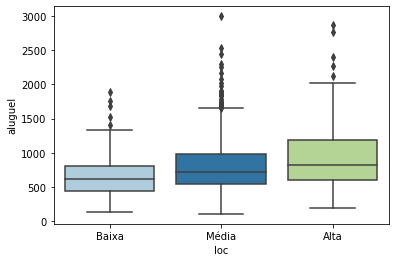

In [337]:
# Gráfico boxplot dos aluguéis para cada localização
#Variável explicativa eixo x = loc
#Variável resposta eixo y = aluguel

list=['Baixa','Média','Alta']
sns.boxplot(x='loc', y='aluguel', data=df, palette='Paired', order=list)

In [227]:
# Mostrando algumas medidas descritivas 

df.groupby(['loc'])['aluguel'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
loc,,,,,,,,
Alta,550.0,906.7,408.8,190.3,596.0,823.0,1188.9,2869.9
Baixa,172.0,652.0,318.9,125.5,443.2,611.3,809.7,1887.0
Média,1247.0,792.1,362.5,102.0,539.3,722.6,983.9,3000.0


In [228]:
# Diferença entre o valor máximo e o valor mínimo de cada localização

df.groupby(['loc'])['aluguel'].max()-df.groupby(['loc'])['aluguel'].min()

loc
Alta     2679.6
Baixa    1761.5
Média    2898.0
Name: aluguel, dtype: float64

In [247]:
# Cálculo da variância

df.groupby(['loc'])['aluguel'].var().round(1)

loc
Alta     167077.5
Baixa    101684.1
Média    131419.1
Name: aluguel, dtype: float64

Observa-se que os bairros com renda mais baixa apresentam menor variabilidade dos valores do aluguéis e apresentam um aluguel médio de 652 euros. Os bairros de renda alta apresentam a maior variabilidade e um aluguel médio de 906 euros.

### Cruzamento das variáveis Aluguel x Loc x Aquecimento 

In [252]:
# Agrupando por Loc e Aquecimento em relação a média dos aluguéis

loc_aq_al=df.groupby(['loc','aquecimento'])['aluguel'].mean().round(2).unstack()
loc_aq_al

aquecimento,0,1
loc,,
Alta,940.01,666.42
Baixa,716.70,494.05
Média,848.89,588.64


<AxesSubplot:title={'center':'Classificação localização x Aquecimento x Média do Aluguel'}, xlabel='loc'>

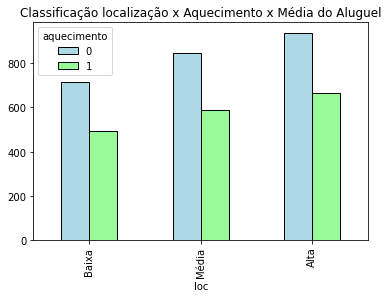

In [338]:
# Plotando o gráfico de barras 

colors=['lightblue','palegreen']
(loc_aq_al).loc[['Baixa','Média','Alta']].plot(kind='bar', color=colors, edgecolor='black', title='Classificação localização x Aquecimento x Média do Aluguel')

Em todos os bairros as casas que possuem aquecimento superam as residências que não possuem.

### Variável: Metragem

* Tamanho em metros quadrados

In [254]:
# Frequência absoluta

met_ab = df.groupby('metragem')['metragem'].count()
met_ab

metragem
30     29
31      7
32     19
33     13
34     17
       ..
116     1
117     2
118     7
119     2
120    15
Name: metragem, Length: 91, dtype: int64

In [255]:
# Algumas medidas descritivas da variável metragem

df['metragem'].describe()


count    1969.000000
mean       67.732351
std        20.855557
min        30.000000
25%        52.000000
50%        67.000000
75%        82.000000
max       120.000000
Name: metragem, dtype: float64

Observa-se que em média das casas possuem 67.7 metros quadrados. A maior casa analisada tem 120 m² e a menor 30 m².

In [260]:
#Gerando um intervalo de classes da variável metragem com 6 divisões

df['metragem_grupo'] = pd.cut(df['metragem'], bins=6)
df['metragem_grupo']

0        (45.0, 60.0]
1        (45.0, 60.0]
2        (60.0, 75.0]
3        (45.0, 60.0]
4        (45.0, 60.0]
            ...      
1964     (45.0, 60.0]
1965     (45.0, 60.0]
1966    (29.91, 45.0]
1967     (45.0, 60.0]
1968     (45.0, 60.0]
Name: metragem_grupo, Length: 1969, dtype: category
Categories (6, interval[float64]): [(29.91, 45.0] < (45.0, 60.0] < (60.0, 75.0] < (75.0, 90.0] < (90.0, 105.0] < (105.0, 120.0]]

In [261]:
#Frequência absoluta por classe

met_ab=df.groupby(['metragem_grupo'])['metragem_grupo'].count()
met_ab

metragem_grupo
(29.91, 45.0]     333
(45.0, 60.0]      449
(60.0, 75.0]      498
(75.0, 90.0]      407
(90.0, 105.0]     189
(105.0, 120.0]     93
Name: metragem_grupo, dtype: int64

In [262]:
# Frequência relativa por classe

met_rel = ((df.groupby(['metragem_grupo'])['metragem_grupo'].count())/df.shape[0])
round((met_rel*100),2)

metragem_grupo
(29.91, 45.0]     16.91
(45.0, 60.0]      22.80
(60.0, 75.0]      25.29
(75.0, 90.0]      20.67
(90.0, 105.0]      9.60
(105.0, 120.0]     4.72
Name: metragem_grupo, dtype: float64

<AxesSubplot:title={'center':'Histograma da Metragem das Residências'}, ylabel='Frequency'>

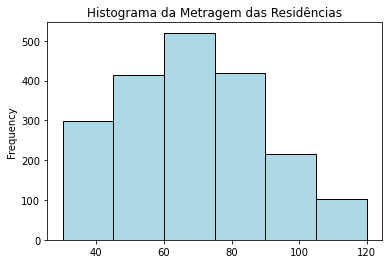

In [265]:
#Plotando um Histograma com a frequência absoluta

A classe entre 60 e 75 m² é a que apresenta maiores observações, com um total de 498 residências (25.29%). Habitações entre 105 e 120 m² apresentam 93 observações (4.72%).df['metragem'].plot(kind='hist', color='lightblue', edgecolor='black', bins=6, title='Histograma da Metragem das Residências')

A classe entre 60 e 75 m² é a que apresenta maiores observações, com um total de 498 residências (25.29%). Habitações entre 105 e 120 m² apresentam 93 observações (4.72%).

### Cruzamento das variáveis Aluguel x Metragem

Text(0.5, 1.0, 'Aluguel x Metragem')

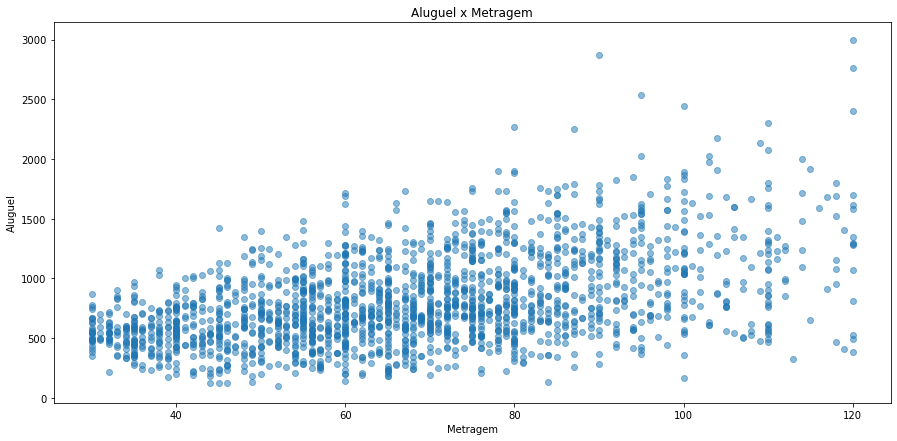

In [276]:
# Gráfico de dispersão (scatterplot)

plt.figure(figsize=(15, 7))
plt.scatter(df['metragem'], df['aluguel'], label='o',alpha=0.5)
plt.xlabel('Metragem')
plt.ylabel('Aluguel')
plt.title('Aluguel x Metragem')

In [277]:
# Agrupando a metragem em relação a média dos aluguéis

met_al=df.groupby('metragem_grupo')['aluguel'].mean().round(2)
met_al

metragem_grupo
(29.91, 45.0]      568.69
(45.0, 60.0]       691.86
(60.0, 75.0]       805.07
(75.0, 90.0]       939.91
(90.0, 105.0]     1089.22
(105.0, 120.0]    1174.72
Name: aluguel, dtype: float64

In [279]:
# Coeficiente de variação do aluguel para cada classe de metragem

cv = (df.groupby(['metragem_grupo'])['aluguel'].std())/(df.groupby(['metragem_grupo'])['aluguel'].mean())
cv

metragem_grupo
(29.91, 45.0]     0.342558
(45.0, 60.0]      0.417309
(60.0, 75.0]      0.392322
(75.0, 90.0]      0.416664
(90.0, 105.0]     0.391711
(105.0, 120.0]    0.461471
Name: aluguel, dtype: float64

Pelo gráfico de dispersão observa-se que a medida que a variável metragem aumenta, a variável aluguel tenda a aumentar também.
Porém, como há uma dispersão dos dados outras variáveis podem estar relacionada como a Localização (loc), o ano de construção (Ano) e se a residência possui aquecimento.

### Cruzamento das variáveis Aluguel x Metragem x Loc

In [289]:
# Agrupando por Loc e Metragem em relação a média dos aluguéis

loc_met_al=df.groupby(['loc','metragem_grupo'])['aluguel'].mean().round().unstack().transpose()
loc_met_al

loc,Alta,Baixa,Média
metragem_grupo,,,
"(29.91, 45.0]",590.0,486.0,570.0
"(45.0, 60.0]",723.0,543.0,701.0
"(60.0, 75.0]",893.0,600.0,790.0
"(75.0, 90.0]",1078.0,738.0,903.0
"(90.0, 105.0]",1201.0,863.0,1071.0
"(105.0, 120.0]",1438.0,924.0,1102.0


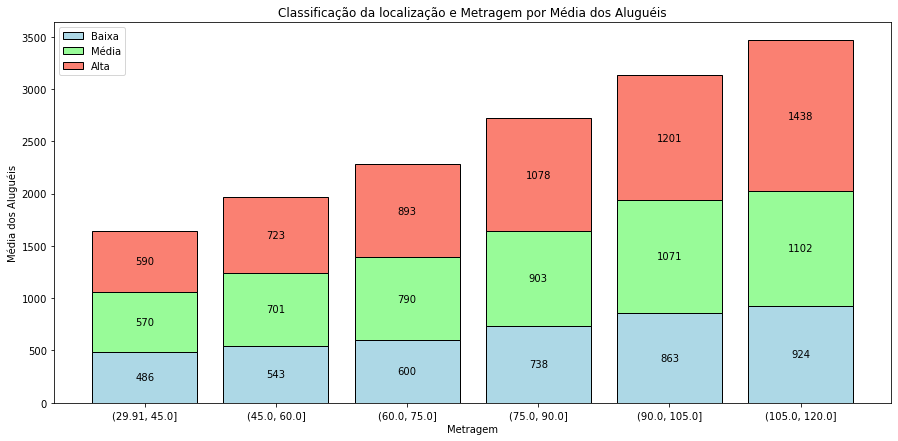

In [341]:
import numpy as np
 
plt.figure(figsize=(15, 7))

#Criando os dados
x = ['(29.91, 45.0]', '(45.0, 60.0]', '(60.0, 75.0]', '(75.0, 90.0]', '(90.0, 105.0]', '(105.0, 120.0]']
y1 = np.array([486, 543, 600, 738, 863, 924])
y2 = np.array([570,701,790,903,1071,1102])
y3 = np.array([590,723,893,1078,1201,1438])
  
#Plotando as barras agrupadas
plt.bar(x, y1, edgecolor='black', color='lightblue')
plt.bar(x, y2, edgecolor='black', bottom=y1, color='palegreen')
plt.bar(x, y3, edgecolor='black',bottom=y1+y2, color='salmon')

#Plotando os rótulos de valores para cada barra empilhada
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, yval, ha="center", va="center")
    
#Customização do gráfico
plt.xlabel("Metragem")
plt.ylabel("Média dos Aluguéis")
plt.legend(["Baixa", "Média", "Alta"])
plt.title("Classificação da localização e Metragem por Média dos Aluguéis")
plt.show()


O gráfico mostra a média dos aluguéis quando comparado com a metragem das residência e a classificação dos bairros pela renda. 

Nos bairros de renda alta uma residência entre 29 e 45 m² custa 590 euros, já uma casa entre 105 e 120 m² custa 1438 euros.

Nos bairros de renda média uma residência entre 29 e 45 m² custa em média 570 euros, em habitações com metragem entre 105 e 120 o aluguel é em média 1102 euros.

Em bairros classificados como renda baixa as casas com metragem entre 29 e 45 m² têm um aluguel médio de 486 euros, as residências entre 105 e 120 m² têm um aluguel médio de 924 euros.

### Cruzamento das variáveis Aluguel x Metragem x Aquecimento

In [317]:
# Agrupando por Loc e Metragem em relação a média dos aluguéis

loc_met_aq=df.groupby(['aquecimento','metragem_grupo'])['aluguel'].mean().round().unstack().transpose()
loc_met_aq

aquecimento,0,1
metragem_grupo,,
"(29.91, 45.0]",602.0,412.0
"(45.0, 60.0]",755.0,527.0
"(60.0, 75.0]",847.0,618.0
"(75.0, 90.0]",984.0,693.0
"(90.0, 105.0]",1146.0,789.0
"(105.0, 120.0]",1332.0,724.0


Text(0, 0.5, 'Média dos Aluguéis')

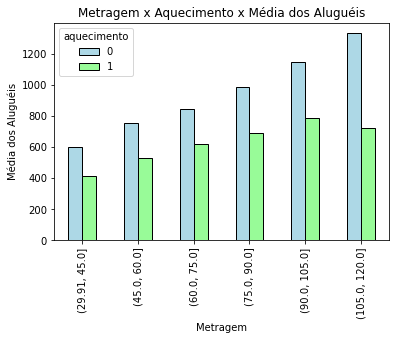

In [342]:
# Gráfico de linha do agrupamento

colors=['lightblue','palegreen']
(loc_met_aq).plot(kind='bar', color=colors, edgecolor='black', title='Metragem x Aquecimento x Média dos Aluguéis')
plt.xlabel('Metragem')
plt.ylabel('Média dos Aluguéis')


In [330]:
# Divisão do aluguél médio de uma residência com aquecimento e sem aquecimento em relação a sua metragem

round((loc_met_aq[0])/(loc_met_aq[1]),2)

metragem_grupo
(29.91, 45.0]     1.46
(45.0, 60.0]      1.43
(60.0, 75.0]      1.37
(75.0, 90.0]      1.42
(90.0, 105.0]     1.45
(105.0, 120.0]    1.84
dtype: float64

Observa-se que uma residência com metragem entre 29 e 45 m² e que possui aquecimento tem um aluguel mensal 46% maior do que uma residência sem aquecimento e de mesma metragem.

Nas residências com metragem entre 105 e 120 m², as casas com aquecimento têm um aluguel 84% maior do que as habitações sem aquecimento. 

